# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

In this notebook, We are going to do a project with BeautifulSoup to Webscrapping data from https://www.exchange-rates.org/history/IDR/USD/T. In this project, we will analyze the exchange rates of Indonesian Rupiahs (IDR) per US Dollar (USD).

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [16]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [17]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="A" />\n<base href="https://www.exchange-rates.org/" />\n'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [18]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [19]:
print(soup.prettify())[:1045]

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="A" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.ne

TypeError: 'NoneType' object is not subscriptable

## Finding the right key to scrap the data & Extracting the right information

In this section we try to find the right key to scrap the data & extracting the right information. Using inpect elemnt on the website, We can find which is the right key to scrap the data that we needed.

In [20]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])


table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/9/2021
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-9-2021">
     14,396.25662
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/3-9-2021">
     USD IDR rate for 3/9/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/8/2021
   </td>
   <td>
    Monday
   </td>
   <td>
    <a href="/Rate/USD/IDR/3-


In [21]:
td = table.find_all('td')
td[:4]

[<td>3/9/2021</td>,
 <td>Tuesday</td>,
 <td><a href="/Rate/USD/IDR/3-9-2021">14,396.25662</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-9-2021">USD IDR rate for 3/9/2021</a></td>]

In [22]:
tr = table.find_all('tr', attrs={'class': None})
tr[:4]

[<tr><td>3/9/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/3-9-2021">14,396.25662</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-9-2021">USD IDR rate for 3/9/2021</a></td></tr>,
 <tr><td>3/8/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/3-8-2021">14,374.33106</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-8-2021">USD IDR rate for 3/8/2021</a></td></tr>,
 <tr><td>3/5/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td></tr>,
 <tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>]

After finding the right key, we can use a loop to append the selected rows from the needed columns to create a data frame (we using a loop because soup can only assign one row at a time). However, on rows 11 and 35 there are 'td' that contain css codes that we don't need. So we can just skip the rows and continue with the other rows. After the correct rows have been assigned, we can swap the position of data from the oldest to the newest.

In [23]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    #scrapping process
    row = table.find_all('tr', attrs={'class': None})[i]
    
    #get date
    date = row.find_all('td')[0].text
    date = date.strip() #for removing the excess whitespace
    
    #get exchange rates
    xc_rate = row.find_all('td')[2].text
    xc_rate = xc_rate.strip() #for removing the excess whitespace
    
    temp.append((date, xc_rate))
    
temp

[('3/8/2021', '14,374.33106 IDR'),
 ('3/5/2021', '14,292.17893 IDR'),
 ('3/4/2021', '14,261.85426 IDR'),
 ('3/3/2021', '14,257.29443 IDR'),
 ('3/2/2021', '14,256.28041 IDR'),
 ('3/1/2021', '14,248.60576 IDR'),
 ('2/26/2021', '14,300.27815 IDR'),
 ('2/25/2021', '14,139.73096 IDR'),
 ('2/24/2021', '14,083.03673 IDR'),
 ('2/23/2021', '14,092.64503 IDR'),
 ('2/22/2021', '14,118.07274 IDR'),
 ('2/19/2021', '14,066.79375 IDR'),
 ('2/18/2021', '14,013.51318 IDR'),
 ('2/17/2021', '14,015.16095 IDR'),
 ('2/16/2021', '13,935.96629 IDR'),
 ('2/15/2021', '13,918.18725 IDR'),
 ('2/12/2021', '13,988.54710 IDR'),
 ('2/11/2021', '13,982.27900 IDR'),
 ('2/10/2021', '13,994.09212 IDR'),
 ('2/9/2021', '13,920.52018 IDR'),
 ('2/8/2021', '14,007.25257 IDR'),
 ('2/5/2021', '14,008.99630 IDR'),
 ('2/4/2021', '14,020.87878 IDR'),
 ('2/3/2021', '13,997.60682 IDR'),
 ('2/2/2021', '14,004.60175 IDR'),
 ('2/1/2021', '14,025.27450 IDR'),
 ('1/29/2021', '14,027.32457 IDR'),
 ('1/28/2021', '14,048.06146 IDR'),
 ('1/

## Creating data frame & Data wrangling

Put the array into dataframe

In [24]:
import pandas as pd

df = pd.DataFrame(temp, columns=('date', 'exchange_rates'))
df.head()

,date,exchange_rates
0,3/8/2021,"14,374.33106 IDR"
1,3/5/2021,"14,292.17893 IDR"
2,3/4/2021,"14,261.85426 IDR"
3,3/3/2021,"14,257.29443 IDR"
4,3/2/2021,"14,256.28041 IDR"


After putting the array into dataframe, We can replace the unnecessary string and transform the data into its respective data types. Check if there are any missing values and rounding the 2 numbers before comma. We also figure out how much the data, its average, standard deviation, maximum, minimum, and its quartile.

In [25]:
df['exchange_rates'] = df['exchange_rates'].str.replace(' IDR','')
df['exchange_rates'] = df['exchange_rates'].str.replace(',','')
df['exchange_rates'] = df['exchange_rates'].astype('float64')
df['date'] = df['date'].astype('datetime64')

In [27]:
df.dtypes

date              datetime64[ns]
exchange_rates           float64
dtype: object

In [28]:
df['exchange_rates'] = df['exchange_rates'].round(2)
df.head()

,date,exchange_rates
0,2021-03-08,14374.33
1,2021-03-05,14292.18
2,2021-03-04,14261.85
3,2021-03-03,14257.29
4,2021-03-02,14256.28


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

Import matplotlib library to do data visualization. Use the date as the x-axis, exchange-rates as the y-axis and describe method as the legend of the plot.

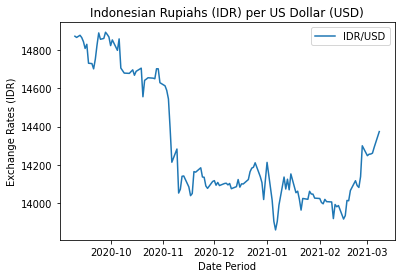

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(df['date'], df['exchange_rates'], linestyle='-', label='IDR/USD')
plt.xlabel('Date Period')
plt.ylabel('Exchange Rates (IDR)') 
plt.title('Indonesian Rupiahs (IDR) per US Dollar (USD)')
plt.legend()

In [45]:
df[df['exchange_rates'] == df['exchange_rates'].min()]

,date,exchange_rates
43,2021-01-06,13861.51


In [46]:
df[df['exchange_rates'] == df['exchange_rates'].max()]

,date,exchange_rates
115,2020-09-28,14892.32


Based on the line chart, the exchange rates from IDR to USD is decreasing, which is good. The value reached its minimum on 6th January 2021 with **IDR 13861.51 / USD**. Although its fluctuative, **Indonesian Rupiahs is getting stronger** against US Dollar.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.